# Elliptic Curve Cryptography Backdoor Example

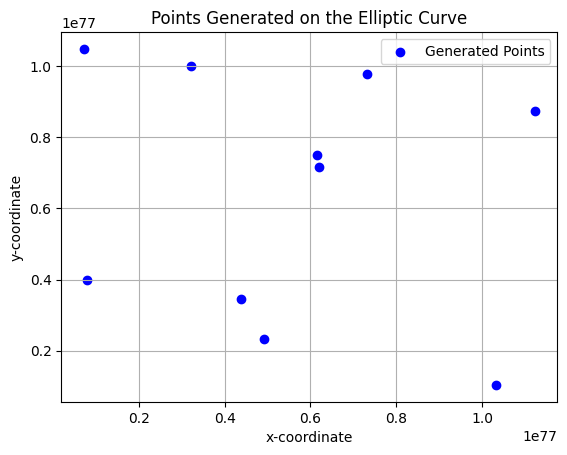

Random Output 1: a245108d266161cd77bd101da3dd46e086f92b52a38cc50ed22a261972be2af1
Random Output 2: 6af2361b504f91e2cc240ef862c3a74ee41d5ad19febe5b65bfaf0155382362e
Random Output 3: 50d93a007973a46a985eb14e623fb10c514700965a12e54e5fbfc9595adb5910
Random Output 4: c0a488a341cabd13cb08d0c884163acd58f184125d239f47e5891c019175f684
Random Output 5: c3a9dd28f3f9df8aef9585186c621802e4731d7e9ced438c5ec5cc94d829356d
Random Output 6: 3bf9a02717e24fd35ef0fd561275a1767b53f113c331e633cb0b46a0df8ab377
Random Output 7: d5d3cbe63c32b3bea6fe8e46ec3db0e569f4952b30c3f6e296b7148d2673cb69
Random Output 8: a057541aac3de7928da74ec8239f59f39970ca55961d396074c8d9740fff82c8
Random Output 9: 88508825a9845e1b50b10b589cdd567c3ea8ee40204a6310d54cef32d974bc50
Random Output 10: ae078d86d2e6476f959319aaa8ea898c176969adb3da43fb57a4a3dec440b876
Predicted Next Seed: 5780847606826790405408948165548701867463298671751272437278987183565760288672
Predicted Random Output: a245108d266161cd77bd101da3dd46e086f92b52a38cc50ed22a2619

In [ ]:
import matplotlib.pyplot as plt
from fastecdsa.curve import P256
from fastecdsa.point import Point
import hashlib

# Define the elliptic curve (NIST P-256 parameters)
curve = P256

# Define a random point P on the curve
P = curve.G

# Define a secret multiplier d (for demonstration purposes)
d = 0xdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeef

# Define the initial seed value
s = 0x1234567890abcdef1234567890abcdef1234567890abcdef1234567890abcdef

# Function to generate random numbers using Dual_EC_DRBG
def dual_ec_drbg(s, P, d, iterations=10):
    points = []
    outputs = []

    for _ in range(iterations):
        P_next = s * P
        s = (P_next * d).x
        random_output = hashlib.sha256(str(s).encode()).hexdigest()
        points.append(P_next)
        outputs.append(random_output)
        
    return points, outputs, s

# Generate points and random outputs
points, random_outputs, final_seed = dual_ec_drbg(s, P, d, iterations=10)

# Plot the points on the elliptic curve
x_vals = [point.x for point in points]
y_vals = [point.y for point in points]

plt.scatter(x_vals, y_vals, c='blue', label='Generated Points')
plt.title('Points Generated on the Elliptic Curve')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.legend()
plt.grid()
plt.show()

# Print random outputs
for i, output in enumerate(random_outputs):
    print(f"Random Output {i+1}: {output}")

# Function to predict next state
def predict_next_state(current_s, P, d):
    P_next = current_s * P
    s_next = (P_next * d).x
    predicted_output = hashlib.sha256(str(s_next).encode()).hexdigest()
    return s_next, predicted_output

# Example of predicting the next state
known_s = s
predicted_s, predicted_output = predict_next_state(known_s, P, d)

# Print predicted next seed and random output
print(f"Predicted Next Seed: {predicted_s}")
print(f"Predicted Random Output: {predicted_output}")

# Function to generate the next state in the dual_ec_drbg algorithm
def generate_next_state(current_s, P, d):
    P_next = current_s * P
    next_s = (P_next * d).x
    next_output = hashlib.sha256(str(next_s).encode()).hexdigest()
    return next_s, next_output

# Generate the actual next state from the initial seed
actual_s, actual_output = generate_next_state(s, P, d)

# Print actual next seed and random output
print(f"Actual Next Seed: {actual_s}")
print(f"Actual Random Output: {actual_output}")

# Assertions to verify the correctness of the predictions
assert predicted_s == actual_s, f"Predicted seed {predicted_s} does not match actual seed {actual_s}"
assert predicted_output == actual_output, f"Predicted output {predicted_output} does not match actual output {actual_output}"

print("Assertions passed! The predictions match the actual values.")


## Secure implementation

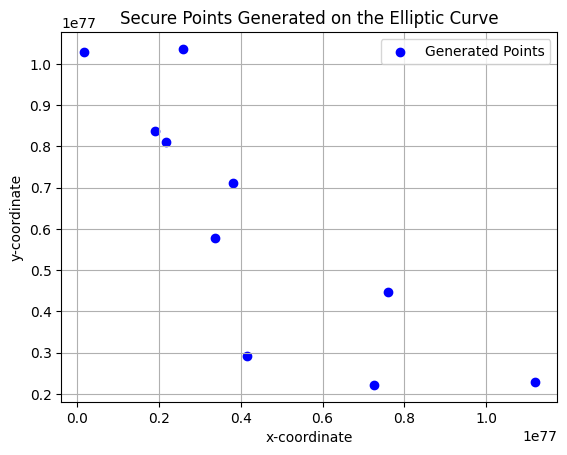

Random Output 1: afd0579bcd4e5e1453410d9f79add9df455362a51a2629d9f99f132e04c59e81
Random Output 2: 60c66b46d68430ba6a6f799bd4d473a1f65627869f7eef451f7b40a651b95c33
Random Output 3: c6a1e266e7a96a93f02cf2a6c767a184e80b44bca4a8547e78664129d3a5d912
Random Output 4: fbdaf3a2a20a863fd8b000039a3e8e7e36082023c550a0a3e48dc1d14dcf0694
Random Output 5: 5c0ad28a8ae79f5a0af1537e7a5eda9049dfd4cb4f26e29008a58e465756299e
Random Output 6: e652bb4ba902eaaf5dc6069ddd10e4877acb75c12661bdb225acffa6fa460ba6
Random Output 7: cd85cd836b791e684aa0915047ad1fc2f79507274c1c8d180a3cbadcf96c1db3
Random Output 8: 2a9d81b6455a30ef0bf53576f2fb7a6770e4794e6d3e8a81bdb614bab97b2be0
Random Output 9: cb5e8382316803494857759c138bd613229bf061cfeb8d7e6a3ace9e3a8103c5
Random Output 10: d9786b0fd0020de766cf5b43683c52639dd4796e6f440024a8e99ae93c9e864a


In [ ]:
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.backends import default_backend
import os
import hashlib

# Securely generate a private key for the elliptic curve
private_key = ec.generate_private_key(ec.SECP256R1(), default_backend())

# Get the corresponding public key (point on the curve)
public_key = private_key.public_key()
public_numbers = public_key.public_numbers()
curve = public_numbers.curve

# Function to securely generate random numbers using ECC
def secure_ecc_drbg(iterations=10):
    points = []
    outputs = []

  
    s = os.urandom(32)

    for _ in range(iterations):
      
        derived_key = HKDF(
            algorithm=hashes.SHA256(),
            length=32,
            salt=None,
            info=b'ecc_drbg',
            backend=default_backend()
        ).derive(s)
        
      
        s_int = int.from_bytes(derived_key, 'big') % curve.key_size
        new_private_key = ec.derive_private_key(s_int, curve, default_backend())
        P_next = new_private_key.public_key().public_numbers()
        
      
        s = derived_key

      
        random_output = hashlib.sha256(derived_key).hexdigest()
        points.append((P_next.x, P_next.y))
        outputs.append(random_output)
        
    return points, outputs

# Generate points and random outputs securely
points, random_outputs = secure_ecc_drbg(iterations=10)

# Plot the points on the elliptic curve
x_vals = [point[0] for point in points]
y_vals = [point[1] for point in points]

plt.scatter(x_vals, y_vals, c='blue', label='Generated Points')
plt.title('Secure Points Generated on the Elliptic Curve')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.legend()
plt.grid()
plt.show()

# Print random outputs
for i, output in enumerate(random_outputs):
    print(f"Random Output {i+1}: {output}")


## Dual EC Controversy

The controversy around the Dual Elliptic Curve Deterministic Random Bit Generator (Dual_EC_DRBG) centers on the potential for a backdoor that could allow the generator’s outputs to be predicted if a secret relationship between certain parameters was known. Here’s a detailed explanation of the background, the provided information, and how the backdoor was discovered:

Information Provided in Dual_EC_DRBG Specification
When the Dual_EC_DRBG was published, it included the following key pieces of information:

1. Elliptic Curve Parameters: The generator specified the use of elliptic curves recommended by NIST (e.g., P-256).
2. Two Public Points: Two points on the elliptic curve, 𝑃 and 𝑄, were defined. The exact relationship between these points was not specified.
3. Algorithm Specification: Detailed steps on how to use these points to generate random numbers were provided, including how to initialize the generator with a seed and how to iterate the process to produce random bits.

### Steps to Implement Dual_EC_DRBG

1. Select a Seed: Start with an initial seed value.
2. Iterative Point Multiplication: In each iteration, multiply the current state (a scalar) by the point 𝑃 to get a new point on the curve.
2. Point Multiplication by 𝑄: The x-coordinate of this new point is then used to produce random bits, and the y-coordinate is discarded.
3. Update the State: The new state is derived using the point 𝑄, but the specifics of how to use 𝑄 were not inherently suspicious unless one considered the possibility of 𝑄 having a special relationship to 𝑃.

### How the Backdoor Was Discovered

1. Initial Suspicion: The initial suspicion came from cryptographic researchers who noted the unusual inclusion of the specific point 𝑄 without a clear reason. In typical elliptic curve applications, defining an additional point 𝑄 without explanation was considered atypical.

2. Research and Analysis: Cryptographers Dan Shumow and Niels Ferguson presented a paper in 2007 at the CRYPTO conference where they demonstrated that if 𝑄 was chosen such that 𝑄 = 𝑑⋅𝑃 for some unknown 𝑑, then knowing 𝑑 would allow an attacker to predict the generator’s output by observing a single output and performing some feasible calculations.

3. Confirmation of Feasibility: Subsequent analysis confirmed that if 𝑑 was known, the security of the generator was entirely compromised. This analysis included mathematical proofs and practical demonstrations showing that with knowledge of 𝑑, an attacker could determine future outputs of the generator.

4. NSA Involvement: Further investigation revealed that the points 𝑃 and 𝑄 were likely selected by the NSA. Given the NSA's role and the lack of transparency around how 𝑄 was chosen, many in the cryptographic community believed that 𝑄 was selected to include a backdoor.

### Detailed Steps to Demonstrate the Backdoor

Here is a Python script that simulates how knowing the secret multiplier 𝑑 could allow prediction of future outputs, assuming 𝑑 was used to derive 𝑄 as 𝑄 = 𝑑 ⋅ 𝑃:

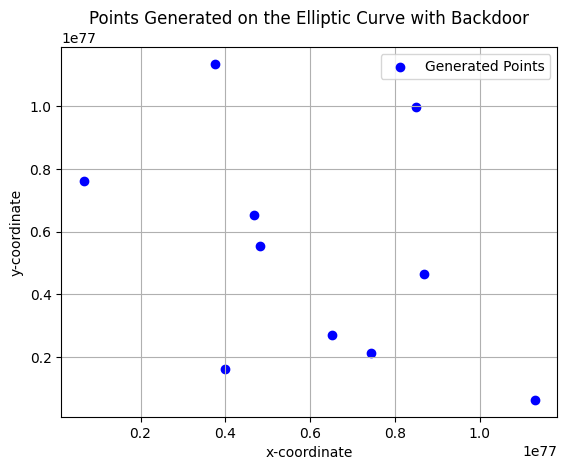

Random Output 1: acf7d3a9de607663277057e4186416885f8deb4a3b9b5beb351b3cd313996f26
Random Output 2: ff77813dd0964f1c4b96cdc5a72ba3a5d7f75098d15e3a0d5faf1e33d32e4ec0
Random Output 3: 1718284bfe6001316630fb8f12055eda7adfd8e0e46af130956e00ddfecd7b53
Random Output 4: e0698840a66325e2f2faf80089b4f4a8a14f68bf1317084f9f6fd2660d9519cc
Random Output 5: cedd7bff7c96147542bfabc01c4229417832499834d7747bed2371c57afafc6e
Random Output 6: 1b2e5e05188fa54b87cfd596434ffe4f77b5cb6a4629b0f04603e545f4e4a148
Random Output 7: 85cf914dd82b8f65ce83311084903a1d7f13c9657777ddacb312ca9f5d35d93c
Random Output 8: a551d6c79dd42d0e224ed3d733e799fe970dc2b119395851cfda78fd34d61056
Random Output 9: e5ae1968068751fcac0631ab9bdd7387ac30b01550e284dd8ffe6530965c6e20
Random Output 10: 3c3f7cf5188062fd0c01aa3e0cdcbf3b6a5c2acda658c61cd636a0c4c0a15262
Assertions passed! The predictions match the actual values.


In [ ]:
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.backends import default_backend
import os
import hashlib

# Define the elliptic curve (SECP256R1 parameters)
curve = ec.SECP256R1()

# Define a secret multiplier d (for demonstration purposes)
d = 0xdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeef

# Generate a random point P on the curve
private_key_P = ec.generate_private_key(curve, default_backend())
public_key_P = private_key_P.public_key()
public_numbers_P = public_key_P.public_numbers()
P = (public_numbers_P.x, public_numbers_P.y)

# Calculate the corresponding point Q = d * P
private_key_dP = ec.derive_private_key(d, curve, default_backend())
public_key_dP = private_key_dP.public_key()
public_numbers_dP = public_key_dP.public_numbers()
Q = (public_numbers_dP.x, public_numbers_dP.y)

# Function to generate random numbers using ECC with a backdoor
def backdoor_ecc_drbg(s, P, Q, d, iterations=10):
    points = []
    outputs = []

    for _ in range(iterations):
      
        derived_key = HKDF(
            algorithm=hashes.SHA256(),
            length=32,
            salt=None,
            info=b'ecc_drbg',
            backend=default_backend()
        ).derive(s)
        
      
        s_int = int.from_bytes(derived_key, 'big') % curve.key_size
        new_private_key = ec.derive_private_key(s_int, curve, default_backend())
        P_next = new_private_key.public_key().public_numbers()
        
      
        next_seed_private_key = ec.derive_private_key(s_int * d % curve.key_size, curve, default_backend())
        next_seed_public_key = next_seed_private_key.public_key().public_numbers()
        s = next_seed_public_key.x.to_bytes((next_seed_public_key.x.bit_length() + 7) // 8, 'big')

      
        random_output = hashlib.sha256(s).hexdigest()
        points.append((P_next.x, P_next.y))
        outputs.append(random_output)
        
    return points, outputs, s

# Initial seed value securely generated
initial_seed = os.urandom(32)

# Generate points and random outputs with backdoor
points, random_outputs, final_seed = backdoor_ecc_drbg(initial_seed, P, Q, d, iterations=10)

# Plot the points on the elliptic curve
x_vals = [point[0] for point in points]
y_vals = [point[1] for point in points]

plt.scatter(x_vals, y_vals, c='blue', label='Generated Points')
plt.title('Points Generated on the Elliptic Curve with Backdoor')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.legend()
plt.grid()
plt.show()

# Print random outputs
for i, output in enumerate(random_outputs):
    print(f"Random Output {i+1}: {output}")

# Demonstrating predictability if secret d is known
def predict_next_state_with_backdoor(current_s, P, Q, d):
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'ecc_drbg',
        backend=default_backend()
    ).derive(current_s)
    
    s_int = int.from_bytes(derived_key, 'big') % curve.key_size
    next_seed_private_key = ec.derive_private_key(s_int * d % curve.key_size, curve, default_backend())
    next_seed_public_key = next_seed_private_key.public_key().public_numbers()
    s_next = next_seed_public_key.x.to_bytes((next_seed_public_key.x.bit_length() + 7) // 8, 'big')
    predicted_output = hashlib.sha256(s_next).hexdigest()
    
    return s_next, predicted_output

# Example of predicting the next state with backdoor
predicted_s, predicted_output = predict_next_state_with_backdoor(initial_seed, P, Q, d)

# Generate the actual next state from the initial seed
actual_points, actual_outputs, actual_s = backdoor_ecc_drbg(initial_seed, P, Q, d, iterations=1)
actual_output = actual_outputs[0]

# Assertions to verify the correctness of the predictions
assert predicted_s == actual_s, f"Predicted seed {predicted_s} does not match actual seed {actual_s}"
assert predicted_output == actual_output, f"Predicted output {predicted_output} does not match actual output {actual_output}"

print("Assertions passed! The predictions match the actual values.")


## Making sure there are no hidden relationships

Checks for simple multiplication relationship:

In [ ]:
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.backends import default_backend
import random

# Define the elliptic curve (SECP256R1 parameters)
curve = ec.SECP256R1()

# Generate random points P and Q on the curve
private_key_P = ec.generate_private_key(curve, default_backend())
public_key_P = private_key_P.public_key()
public_numbers_P = public_key_P.public_numbers()
P = (public_numbers_P.x, public_numbers_P.y)

private_key_Q = ec.generate_private_key(curve, default_backend())
public_key_Q = private_key_Q.public_key()
public_numbers_Q = public_key_Q.public_numbers()
Q = (public_numbers_Q.x, public_numbers_Q.y)

# Function to check for a simple multiplicative relationship
# def check_simple_relationship(P, Q, curve, max_d=1000000):
def check_simple_relationship(P, Q, curve, max_d=10000):
    for d in range(1, max_d):
      
        try:
            private_key_dP = ec.derive_private_key(d, curve, default_backend())
            public_key_dP = private_key_dP.public_key()
            public_numbers_dP = public_key_dP.public_numbers()
            dP = (public_numbers_dP.x, public_numbers_dP.y)
            if dP == Q:
                return d
        except ValueError:
            continue
    return None

# Check for simple multiplicative relationship
relationship = check_simple_relationship(public_numbers_P, public_numbers_Q, curve)
if relationship:
    print(f"Found a simple multiplicative relationship: Q = {relationship} * P")
else:
    print("No simple multiplicative relationship found between P and Q")


No simple multiplicative relationship found between P and Q


# Weak elliptic curves

In [ ]:
from ecdsa import ellipticcurve, SigningKey, VerifyingKey, BadSignatureError, numbertheory, NIST192p
import hashlib

# Define a small prime field and elliptic curve parameters
p = 67
a = 2 
b = 3 

# Define the elliptic curve y^2 = x^3 + ax + b (mod p)
curve = ellipticcurve.CurveFp(p, a, b)

# Define a base point (generator) on the curve
Gx, Gy = 2, 22
G = ellipticcurve.Point(curve, Gx, Gy)

# Define a small private key k
private_key = 5
public_key = private_key * G

print("Curve:", curve)
print("Base point G:", G)
print("Public key Q:", public_key)

# Weak ECC key generation function
def weak_key_generation():
    sk = SigningKey.from_secret_exponent(private_key, curve=NIST192p)
    vk = sk.verifying_key
    return sk, vk

# Generate weak ECC key pair
sk, vk = weak_key_generation()

# Sign a message
message = b"Test message"
signature = sk.sign(message, hashfunc=hashlib.sha256)
print("Signature:", signature)

# Brute-force search to find the private key (discrete log k)
def brute_force_private_key(P, Q):
    k = 1
    R = P
    while R != Q:
        k += 1
        R += P
    return k

# Finding the private key for Q = kG
brute_forced_private_key = brute_force_private_key(G, public_key)
print("Brute-forced private key:", brute_forced_private_key)

# Create a new signing key from the brute-forced private key
sk_brute_forced = SigningKey.from_secret_exponent(brute_forced_private_key, curve=NIST192p)

# Sign a new message
new_message = b"New test message"
new_signature = sk_brute_forced.sign(new_message, hashfunc=hashlib.sha256)
print("New Signature:", new_signature)

# Verify the new signature with the original public key
try:
    assert vk.verify(new_signature, new_message, hashfunc=hashlib.sha256)
    print("The new signature is valid.")
except BadSignatureError:
    print("The new signature is invalid.")


Curve: CurveFp(p=67, a=2, b=3)
Base point G: (2,22)
Public key Q: (1,41)
Signature: b'a\xcc3@\x96#\xb6[#\x82\xef:\xba\xe4$\xe9\\\xd9\x06t\x93H-\x18\xb7\xccd\xef\x00\x9aE{Uc\x16\x92=\xf7\xfc\x97\xd8\xaf\xbd\x98\n\xa5\xe0w'
Brute-forced private key: 5
New Signature: b'D\xd7\x80\xa3\xa2#B^~n\xd0\xfb\xa4\xc8\xb9\xbc\xcf9\xe4w2\x80\xe6>K\x88+\xb2\xeb\xac\xc7 \xbe\xbb\xf6\x8deo\xc66\xb9k~\xc7\xb2\xc2\xcad'
The new signature is valid.


# Strong elliptic curve signatures

In [43]:
from ecdsa import SigningKey, SECP256k1

# Generate a new private key using the SECP256k1 curve
private_key = SigningKey.generate(curve=SECP256k1)
public_key = private_key.get_verifying_key()

# Get the curve parameters
curve = SECP256k1.curve
p = curve.p()
a = curve.a()
b = curve.b()
G = SECP256k1.generator
Gx = G.x()
Gy = G.y()
n = SECP256k1.order

# Output the parameters and keys
print("Curve parameters:")
print("p:", p)
print("a:", a)
print("b:", b)
print("Base point G:")
print("Gx:", Gx)
print("Gy:", Gy)
print("Order n:", n)
print("Private key:", private_key.to_string().hex())
print("Public key:", public_key.to_string().hex())

# Sign a message
message = b"Secure message"
signature = private_key.sign(message)
print("Signature:", signature.hex())

# Verify the signature
assert public_key.verify(signature, message)
print("Signature is valid.")

Curve parameters:
p: 6864797660130609714981900799081393217269435300143305409394463459185543183397656052122559640661454554977296311391480858037121987999716643812574028291115057151
a: 0
b: 7
Base point G:
Gx: 55066263022277343669578718895168534326250603453777594175500187360389116729240
Gy: 32670510020758816978083085130507043184471273380659243275938904335757337482424
Order n: 115792089237316195423570985008687907852837564279074904382605163141518161494337
Private key: 45676816c2756a568d313c44eb7d53c38b65cfa25b5aeaf2d0ddf41da93288a1
Public key: 2c86e4b629c8e811d9bc0922a3675b6c9251a13140f0c975746405b511ea5d7d0df85d9e24ab436fd06b090d6535ad898a09af9e3df72d36b0437c1357438369
Signature: 1ef39b9f272d0d6320a58c7f794b44b55112f2cae7236296b729ca52e4a58174847ab9837282167b3b9a7936eede31fcd4b124c1d4f2dfca7cca7a33d8a9783b
Signature is valid.


In [ ]:
from Crypto.Util.number import getPrime, inverse
from random import randint

# Define an elliptic curve: y^2 = x^3 + ax + b (mod p)
class EllipticCurve:
    def __init__(self, a, b, p):
        self.a = a
        self.b = b
        self.p = p

    def add(self, P, Q):
        if P is None: return Q
        if Q is None: return P

        x1, y1 = P
        x2, y2 = Q

        if P == Q:
            lmbda = (3 * x1**2 + self.a) * inverse(2 * y1, self.p) % self.p
        else:
            lmbda = (y2 - y1) * inverse(x2 - x1, self.p) % self.p

        x3 = (lmbda**2 - x1 - x2) % self.p
        y3 = (lmbda * (x1 - x3) - y1) % self.p

        return (x3, y3)

    def multiply(self, P, k):
        R = None
        for i in range(k.bit_length()):
            if k & (1 << i):
                R = self.add(R, P)
            P = self.add(P, P)
        return R

# Generate curve parameters
p = getPrime(128)
a, b = 2, 3      
E = EllipticCurve(a, b, p)
print("Elliptic Curve Parameters:")
print("a:", a)
print("b:", b)
print("p:", p)


# Define backdoor
# d = randint(1, p) # secret scaler
d = 0xdead
d = randint(1, p)
print("Secret Scalar, d:", d)
P = (randint(1, p), randint(1, p))
Q = E.multiply(P, d)

# PRNG state
s = randint(1, p)

def dual_ec_prng():
    global s
    s = E.multiply(P, s)[0]
    r = E.multiply(Q, s)[0]
    return r

# Generate some pseudorandom numbers
print("Generated numbers:")
for _ in range(5):
    print(dual_ec_prng())

# Backdoor recovery
# def recover_state(r, d):
#     return (r * inverse(d, p)) % p

def recover_state(r, d, p):
    return (r * inverse(d, p)) % p

r1 = dual_ec_prng()
s_recovered = recover_state(r1, d, p)
next_expected_output = E.multiply(Q, s_recovered)[0]

s_actual = E.multiply(P, s_recovered)[0]  # Expected next state
actual_next_output = E.multiply(Q, s_actual)[0]  # Expected next output


try:
    d_inv = inverse(d, p)
except ValueError:
    d_inv = None

modular_inverse_valid = d_inv is not None

manual_recovered_state = (r1 * d_inv) % p if modular_inverse_valid else None

if manual_recovered_state is not None:
    manual_next_state = E.multiply(P, manual_recovered_state)[0]
    manual_next_output = E.multiply(Q, manual_next_state)[0]
else:
    manual_next_output = None
    
def detect_backdoor_relationship(P, Q, p, max_d=10**6):
    """
    Detects potential hidden relationships between the elliptic curve points P and Q.
    This function checks if Q = dP for some small scalar d, indicating a potential backdoor.
    
    Parameters:
    - P: The base point (x, y) on the elliptic curve.
    - Q: The potentially backdoored point (x, y).
    - p: The prime modulus defining the finite field.
    - max_d: The maximum scalar to check for (default: 10^6 for feasibility).

    Returns:
    - The discovered scalar d if a relationship is found, otherwise None.
    """
    for d in range(1, max_d):
        calculated_Q = E.multiply(P, d)
        if calculated_Q is not None and calculated_Q == Q:
            return d  # Found a hidden relationship: Q = dP
    return None

print("Modular Inverse Exists", modular_inverse_valid)
print("Recovered State (Manual)", manual_recovered_state)
print("Next Expected Output (Manual)", manual_next_output)
print("Actual Next Output", actual_next_output)
print("Manual Verification Passed", (manual_next_output == actual_next_output))

detected_d = detect_backdoor_relationship(P, Q, p)

print("Detected Backdoor Scalar", detected_d if detected_d else "No relationship found")
print("Expected Secret Scalar", d)



Secret Scalar, d: 252437971062307691744099226490364870983
Generated numbers:
86864980861005959277099204578690964025
130678181489539704746974869303294167380
237788236356121382698703853775691926728
39433954382999241653971832612784927304
235147467497973588313891560641327819819
Modular Inverse Exists True
Recovered State (Manual) 95604360015399151649488112092895937682
Next Expected Output (Manual) 125050488597569733287224880119229160933
Actual Next Output 125050488597569733287224880119229160933
Manual Verification Passed True


KeyboardInterrupt: 